# ERCA 2024 mini-paper group 5: Snow?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Introduction
How has snow depth and snow fall evolved in differnent towns in Germany?

In [5]:
path_to_data = r'Data/data_monthly_DE_DWD.csv'
# read data
snow_data = pd.read_csv(path_to_data)
# snow depth (HS), depth of snowfall (HN, also denoted as fresh snow or snowfall), 
# snow water equivalent (SWE), snow cover area (SCA), and snow cover duration (SCD)
# look at Bondorf, Hohenpreissenberg and Zugspitze and Unterammergau

In [6]:
snow_data.Name.unique()

array(['Aach', 'Aalen_Unterkochen', 'Aalen_Unterrombach',
       'Abbach_Bad_Dunzling', 'Abensberg_Sandharlanden',
       'Abtsgmund_Neubronn', 'Abtsgmund_Untergroningen',
       'Achberg_Doberatsweiler', 'Achern_Fautenbach', 'Adelmannsfelden',
       'Affing', 'Aholfing', 'Aibling_Bad_Ellmosen', 'Aichstetten',
       'Aiglsbach', 'Aislingen', 'Aiterhofen', 'Aitern_Untermulten',
       'Aitrang', 'Albaching', 'Albstadt_Badkap', 'Albstadt_Burgfelden',
       'Albstadt_Ebingen', 'Albstadt_Onstmettingen',
       'Aldersbach_Kriestorf', 'Alfdorf_Pfahlbronn',
       'Alpirsbach_Klaranlage_', 'Altensteig_Wart',
       'Altheim_Kreis_Biberach', 'Althengstett_Ottenbronn',
       'Altmannstein_Laimerstadt', 'Altmannstein_Pondorf',
       'Altomunster_Maisbrunn', 'Altomunster_Wollomoos',
       'Altusried_Krugzell', 'Altusried_Muthmannshofen', 'Amerang_Kammer',
       'Amerang_Pfaffing', 'Amerdingen', 'Andechs_Erling',
       'Anger_Oberhogl', 'Anger_Stoissberg', 'Apfeldorf', 'Arnstorf',
       

# monthly depth of snowfall (HNsum) over time for the 4 stations

In [36]:
snow_data_Bondorf = snow_data.where(snow_data.Name=='Bondorf').dropna()
snow_data_Unterammergau = snow_data.where(snow_data.Name=='Unterammergau').dropna()
snow_data_Zugspitze = snow_data.where(snow_data.Name=='Zugspitze').dropna()
snow_data_Hohenpeissenberg = snow_data.where(snow_data.Name=='Hohenpeissenberg').dropna()

snow_data_Zugspitze.month

531252    1.0
531253    2.0
531254    3.0
531255    4.0
531256    5.0
         ... 
531936    1.0
531937    2.0
531938    3.0
531939    4.0
531940    5.0
Name: month, Length: 689, dtype: float64

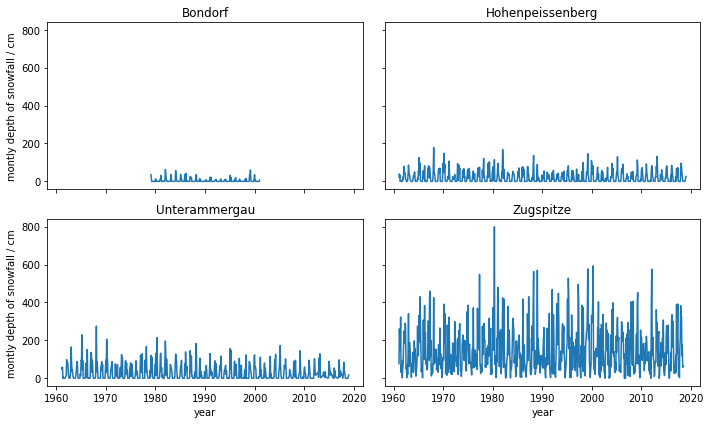

In [51]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,6), )
ax[0,0].set_title('Bondorf')
ax[0,0].plot(snow_data_Bondorf.year + snow_data_Bondorf.month/12, snow_data_Bondorf.HNsum, label='Bondorf')
ax[1,0].set_title('Unterammergau')
ax[1,0].plot(snow_data_Unterammergau.year + snow_data_Unterammergau.month/12, snow_data_Unterammergau.HNsum, label='Unterammergau')
ax[0,1].set_title('Hohenpeissenberg')
ax[0,1].plot(snow_data_Hohenpeissenberg.year + snow_data_Hohenpeissenberg.month/12, snow_data_Hohenpeissenberg.HNsum, label='Hohenpreissenberg')
ax[1,1].set_title('Zugspitze')
ax[1,1].plot(snow_data_Zugspitze.year + snow_data_Zugspitze.month/12, snow_data_Zugspitze.HNsum, label='Zugspitze')
ax[0,0].set_ylabel('montly depth of snowfall / cm')
ax[1,0].set_ylabel('montly depth of snowfall / cm')
ax[1,0].set_xlabel('year')
ax[1,1].set_xlabel('year')
plt.tight_layout()

In [68]:
# look at yearly snowfall
snow_data_Bondorf.groupby('year').sum().index



Float64Index([1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0,
              1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
              1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0],
             dtype='float64', name='year')

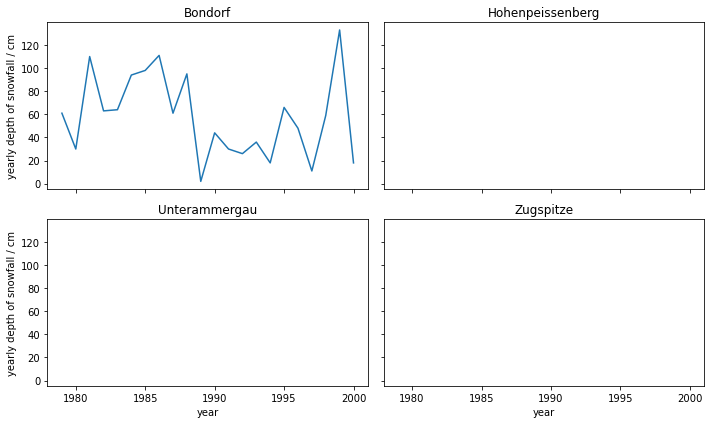

In [69]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,6), )
ax[0,0].set_title('Bondorf')
ax[0,0].plot(snow_data_Bondorf.groupby('year').sum().index, snow_data_Bondorf.groupby('year').sum().HNsum, label='Bondorf')
ax[1,0].set_title('Unterammergau')
ax[1,0].plot(snow_data_Unterammergau.year, snow_data_Unterammergau.groupby('year').sum().HNsum, label='Unterammergau')
ax[0,1].set_title('Hohenpeissenberg')
#ax[0,1].plot(snow_data_Hohenpeissenberg.year, snow_data_Hohenpeissenberg.groupby('year').sum().HNsum, label='Hohenpreissenberg')
ax[1,1].set_title('Zugspitze')
#ax[1,1].plot(snow_data_Zugspitze.year, snow_data_Zugspitze.groupby('year').sum().HNsum, label='Zugspitze')
ax[0,0].set_ylabel('yearly depth of snowfall / cm')
ax[1,0].set_ylabel('yearly depth of snowfall / cm')
ax[1,0].set_xlabel('year')
ax[1,1].set_xlabel('year')
plt.tight_layout()